In [39]:
import numpy as np 
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from skimage.io import imread,imshow
import matplotlib.image as mpimg #read png files
from scipy.ndimage import gaussian_filter
import scipy

In [40]:
## Load the data
data = pd.read_csv('/content/sample_labels.csv')
data.sample(3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
29,00000318_004.png,No Finding,4,318,054Y,F,PA,2048,2500,0.171,0.171
28,00000268_001.png,Infiltration,1,268,049Y,M,AP,2500,2048,0.168,0.168
21,00000181_001.png,Fibrosis,1,181,047Y,F,PA,2500,2048,0.171,0.171


EDA


In [41]:
pd.set_option('display.max_columns', None)
data.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168
4,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139



 Assign 0 or 1 for presence of disease.


In [43]:
labels=np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
labels=[y for y in labels if len(y)>0]
print(labels)

for label in labels:
    if len(label)>1:
        data[label] = data['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)

        
data.head()

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
data.describe()


,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,12.054054,6132.202703,2610.621622,2388.959459,0.157342,0.157342,0.094595,0.081081,0.162162,0.108108,0.121622,0.121622,0.040541,0.256757,0.081081,0.108108,0.081081,0.040541,0.405405,0.108108
std,21.791598,8262.462449,324.792187,354.223420,0.014425,0.014425,0.294652,0.274823,0.371116,0.312636,0.329079,0.329079,0.198569,0.439826,0.274823,0.312636,0.274823,0.198569,0.494322,0.312636
min,0.000000,13.000000,1884.000000,2021.000000,0.139000,0.139000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,156.750000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,499.500000,2500.000000,2500.000000,0.168000,0.168000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,12044.000000,2992.000000,2544.000000,0.168000,0.168000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,113.000000,28924.000000,3056.000000,3056.000000,0.194311,0.194311,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Explore Demographics


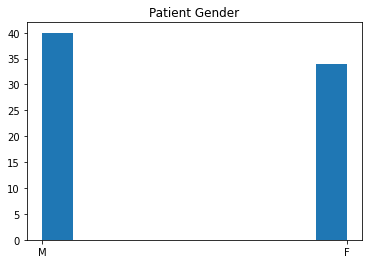

Number of Men are M    40
Name: Patient Gender, dtype: int64
Number of Women are F    34
Name: Patient Gender, dtype: int64


In [46]:
#Gender distribution
plt.hist(data['Patient Gender'])
plt.title('Patient Gender')
plt.show()
print('Number of Men are {}'.format(data['Patient Gender'][(data['Patient Gender']=='M')].value_counts()))
print('Number of Women are {}'.format(data['Patient Gender'][(data['Patient Gender']=='F')].value_counts()))


In [48]:
#Count how many unique patients
un=data['Patient ID'][data['Follow-up #']==0].unique().shape[0]
print('Number of unique patients are: ' + str(un))


Number of unique patients are: 12


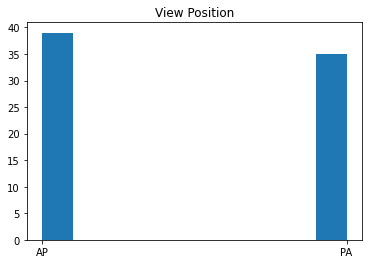

Number of XRays in PA position: PA    35
Name: View Position, dtype: int64
Number of XRays in AP position: AP    39
Name: View Position, dtype: int64


In [50]:
#Patient Position
plt.hist(data['View Position'])
plt.title('View Position')
plt.show()
PA1=data['View Position'][data['View Position']=='PA']
AP1=data['View Position'][data['View Position']=='AP']

print('Number of XRays in PA position: ' + str(PA1.value_counts()))
print('Number of XRays in AP position: ' + str(AP1.value_counts()))


In [51]:
#Number of Pneumonia cases and Non-Pneumonia Cases
PPneu=data[data['Pneumonia']==1]
NPneu=data[data['Pneumonia']==0]
print('Total Pneumonia cases: '+ str(len(PPneu)))
print('Total Non-Pneumonia cases: {}'.format(len(NPneu)))
print('In this dataset, the percentage of pneumonia cases is {}%'.format(np.round(100*len(PPneu)/(len(PPneu)+len(NPneu)), 2)))

Total Pneumonia cases: 30
Total Non-Pneumonia cases: 44
In this dataset, the percentage of pneumonia cases is 40.54%


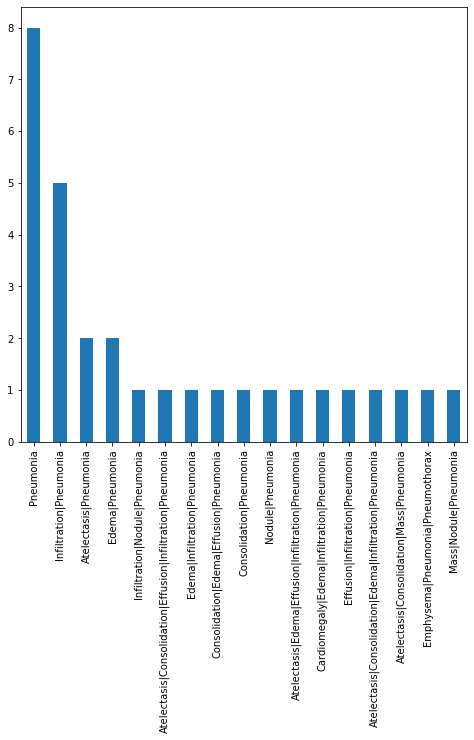

In [52]:
#Comorbitiy with other diseases
plt.figure(figsize=(8,8))
PPneu['Finding Labels'].value_counts()[0:30].plot(kind='bar')


In [54]:
print('pneumonia colaborate with other diseases: \n{}'.format(PPneu['Finding Labels'].value_counts()[0:10]))


pneumonia colaborate with other diseases: 
Pneumonia                                                    8
Infiltration|Pneumonia                                       5
Atelectasis|Pneumonia                                        2
Edema|Pneumonia                                              2
Infiltration|Nodule|Pneumonia                                1
Atelectasis|Consolidation|Effusion|Infiltration|Pneumonia    1
Edema|Infiltration|Pneumonia                                 1
Consolidation|Edema|Effusion|Pneumonia                       1
Consolidation|Pneumonia                                      1
Nodule|Pneumonia                                             1
Name: Finding Labels, dtype: int64


In [56]:
#Number of Disease per patient with Mean
data['Total Diseases']=data[labels].sum(axis=1)
data['Total Diseases'][data['No Finding']==1.0] = 0
print('Number of Diseases per person: {}'.format(np.round(data['Total Diseases'].mean(),2)))


Number of Diseases per person: 1.7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
data


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Total Diseases
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,00022192_032.png,Pneumonia,32,22192,073Y,M,PA,2992,2991,0.143,0.143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
70,00026179_003.png,Pneumonia,3,26179,026Y,F,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
71,00027725_073.png,Emphysema|Pneumonia|Pneumothorax,73,27725,021Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
72,00027757_002.png,Effusion|Infiltration|Pneumonia,2,27757,021Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


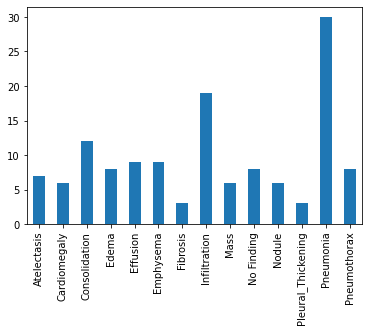

In [58]:
data[labels].sum().plot(kind='bar')


In [59]:
(data['No Finding']==0).sum()


66

Pixel Level Assessments


In [62]:
#sample_df will be used for this EDA
s_labels=np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
s_labels=[y for y in s_labels if len(y)>0]
print(s_labels)

for label in s_labels:
    if len(label)>1:
        data[label] = data['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)

data.head()

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Total Diseases
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Find image paths 
image_paths = {os.path.basename(t): t for t in 
                   glob(os.path.join('data', '*.png'))}
print('Scans found:', len(image_paths), ', Total Headers', data.shape[0])
data['path'] = data['Image Index'].map(image_paths.get)
data.head()


Scans found: 74 , Total Headers 74


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Total Diseases,path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,data/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,data/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,data/00000017_001.png
3,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,data/00000032_001.png
4,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,data/00000042_002.png


Text(0.5, 1.0, ' Finding AP Position')

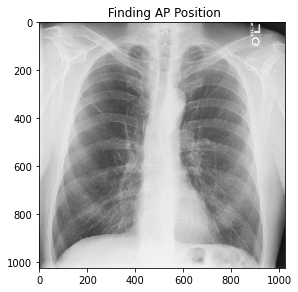

In [66]:
#AP Position
sampimg1=imread('/content/data/00000079_000.png')
imshow(sampimg1, cmap='gray')
plt.title(' Finding AP Position')


Text(0.5, 1.0, 'Emphysema|Infiltration|Pleural_Thickening|Pneumonia AP Position')

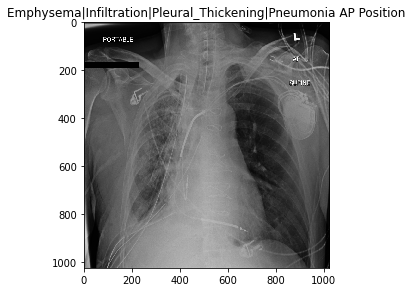

In [69]:
sampimg2=imread('/content/data/00000013_005.png')
imshow(sampimg2, cmap='gray')
plt.title('Emphysema|Infiltration|Pleural_Thickening|Pneumonia AP Position')


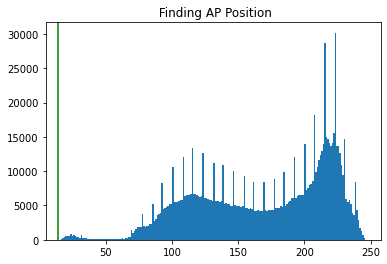

In [68]:
plt.hist(sampimg1.ravel(),bins=200)
plt.title(' Finding AP Position')
plt.axvline(14,color='green')
plt.show()

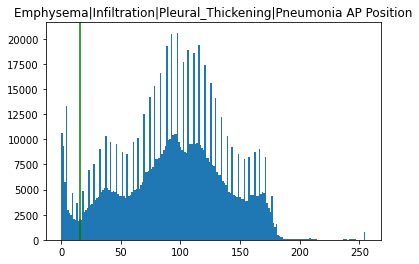

In [71]:
plt.hist(sampimg2.ravel(),bins=200)
plt.title('Emphysema|Infiltration|Pleural_Thickening|Pneumonia AP Position')
plt.axvline(16,color='green')
plt.show()


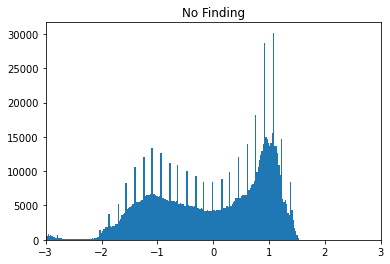

In [72]:
#Normalize Image Data
normimg1=(sampimg1-sampimg1.mean())/sampimg1.std()
plt.hist(normimg1.ravel(), bins=200)
plt.xlim(-3,3)
plt.title('No Finding')
plt.show()
